
**Name**: 

**Student ID**:

**Date**:

<hr>

##### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 1
#### Topics:
- The Linear Model
- Linear Least Squares
- Exploratory data analysis
- Normal, chisquared, t, and F distributions

#### Due: 03/22/2022 by 18:30

$\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}$

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>

<hr>
<hr>

## Problem 1 (Making a Model)
A project management team want to model the number of two types of users, called type $A$ and type $B$, over time. The model they want to use has the overall number of users growing linearly over time. At time $t=0$ (not necessarily the website launching date) the linear model should have expected number of users equal in the two groups. At time $t=100$, they introduce a new feature. They think this could change the slope at time $t=100$ but only for users of type $A$ (it changes the *slope*, hence would not put a jump discontinuity into the expected number of users).

1. Write a linear model that the team can use. Be sure to say what features $\{Z_{ij}\}$ go into the model.
2. Maybe the intervention did not do anything. Which parameter in your model would then be zero? (make sure you have such a parameter in your model). 

*The point*: as data scientistis/statistician, you have to turn the domain person's intuition into a model. They may not come to you talking about $x$s and $y$s and $\beta$ and $\epsilon$. Also, the model might be something they want to disprove. 

<hr> 
<hr>

1. The relavent model in this case is the Two-phase linear regression model. The "base" model is a one with t (time), user_type dummy feature as features. if we use the two-phase regression, than we add 
$[t-100]_+$ as a feature as well.

</br> 
</br>

To conclude, this is the model:
$$
x_1 = \begin{cases}
1 & \mathrm{UserTypeA} \\
0 & \mathrm{else}
\end{cases}
$$
The model is
$$
\begin{align}
\mathbb E\left[Y | X=x \right] & = \beta_0 + \beta_1 \cdot t + \beta_2 \cdot x_1 \cdot [t-100]_+
\end{align}
$$
This is a linear model with predictors(aka features) $X = (1, t, x_1, x_1 \cdot [t-100])$. $\beta_2$ corresponds to the "extra effect" of the type A users group
</br> 
</br>
</br> 
2. 
If the intervention didn't do anything, I'd expect $\beta_2$ to be 0. Furthermore, I'd look at the p-value of $\beta_2$, and expect it to not be significant (higher than 0.05). 
</br> 
I will also note that I wouldn't look at $\R^2$ because it increases (or doesn't change) with every feature we add to the model, which doesn't really help understand the feature impact in our model.
</br>
</br> 
</br>

## Problem 2 (Linerization trick in Sinusiodal Regression)
1. Consider the model:
$$
\mathbb E[Y|X=x] = \beta_0 + \beta_1 \sin\left(2\pi  (x - \beta_2) \right)
$$
with predictor $x$, response varaible $y$, and parameters $\beta_0$, $\beta_1$, and $\beta_2$. Is this model linear?
</br>
</br>
ANSWER:  
No. only because there is a parameter ($\beta_2$) inside a $sin()$ function. Which means the parameter is not linear
</br>
</br>
</br>

2. Consider instead the model:
$$
\mathbb E[Y|X=x] = \beta_0' + \beta_1' \sin\left(2\pi \cdot x\right) + \beta_2' \cos(2 \pi \cdot x),
$$
with predictor $x$, response varaible $y$, and parameters $\beta_0'$, $\beta_1'$, and $\beta_2'$. Is this model linear?
</br>
</br>
ANSWER: 
</br>
Yes. as long as the parameters(coefficents, Betas) of the model are outside the non-linear function, and they themselfes are linear(the $\beta_j$ is to the power of $1$), the model is linear. We can do any kind of transformation (even non-linear transformations, such as $sin$, $cos$) on  the input variable and the model will still be linear.
</br>
</br>
</br>

3. Show that the model from 1 can be written as the model in 2 in the sense that $(\beta_0', \beta_1', \beta_2')$ are a function of $(\beta_0, \beta_1', \beta_2')$. Find this function.
</br>
</br>
ANSWER:
We'll use the following trigonometric identity: 
</br>
$$
sin(a-b) = sin(a)cos(b) - sin(b)cos(a)
$$
-->
$$
sin(2\pi(x-\beta_2)) = sin(2\pi \cdot x) cos(2 \pi \beta_2) - sin(2 \pi \beta_2) cos(2\pi \cdot x)
$$
-->
$$
\mathbb E[Y|X=x] = \beta_0 + \beta_1 \sin\left(2\pi  (x - \beta_2) \right) = \beta_0 + \beta_1 ( sin(2\pi \cdot x) cos(2 \pi \beta_2) - sin(2 \pi \beta_2) cos(2\pi \cdot x))
$$
-->
$$
\mathbb E[Y|X=x] = \beta_0 + \beta_1 sin(2\pi \cdot x) cos(2 \pi \beta_2) - \beta_1 sin(2 \pi \beta_2) cos(2\pi \cdot x)
$$
-->
$$
\beta_0' = \beta_0
$$
$$
\beta_1' = \beta_1 cos(2 \pi \beta_2)
$$
$$
\beta_2' = -\beta_1 sin(2 \pi \beta_2)
$$

</br>
</br>
</br>
<hr>

## Problem 3 (EDA)
For this problem, you will need to go through the exploratory data analysis (EDA) notebook in the course page

1. Download the Red Wine Quality Dataset from UCI repository (the file winequality-red.csv at https://archive.ics.uci.edu/ml/datasets/Wine+Quality). 
2. Filter columns to cosnider only the five variables: $\texttt{density}$, $\texttt{alcohol}$, $\texttt{pH}$, $\texttt{volatile}$, $\texttt{acidity}$, and the target variable $\texttt{quality}$.
3. Evaluate mean, varaince, median, q1, q3, IQR, and absolute range of each variable.
4. Indicate whether there are outlayers, mark and remove those; explain your logic. 
5. Illustrate the covaraince matrix of all variable. Indicate variables most correlated with the target variable. 
6. Illustrate a "pairs plot", i.e. a matrix of scatterplots in which each cell involves two variables except the diagonal.

<hr>
<hr>

In [1]:
# Your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import iqr
import scipy.stats as stats

%matplotlib inline

plt.style.use('seaborn')
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['xtick.labelsize'] = 14 
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 18

sns.set(font_scale=1.8)

In [2]:
my_path = Path("/Users/eyalmichaeli/Desktop/School/Master's/IDC_masters/semester_2/stat/Eyal/Exercises/EX1/")
csv_path = my_path / "winequality-red.csv"
df = pd.read_csv(csv_path, delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


2. Filter columns to cosnider only the five variables: $\texttt{density}$, $\texttt{alcohol}$, $\texttt{pH}$, $\texttt{volatile}$, $\texttt{acidity}$, and the target variable $\texttt{quality}$.


In [3]:
cols_to_use = ["density", "alcohol", "pH", "volatile acidity", "quality"]
df = df[cols_to_use]
df

,density,alcohol,pH,volatile acidity,quality
0,0.99780,9.4,3.51,0.700,5
1,0.99680,9.8,3.20,0.880,5
2,0.99700,9.8,3.26,0.760,5
3,0.99800,9.8,3.16,0.280,6
4,0.99780,9.4,3.51,0.700,5
...,...,...,...,...,...
1594,0.99490,10.5,3.45,0.600,5
1595,0.99512,11.2,3.52,0.550,6
1596,0.99574,11.0,3.42,0.510,6
1597,0.99547,10.2,3.57,0.645,5


3. Evaluate mean, varaince, median, q1, q3, IQR, and absolute range of each variable.


In [4]:
statistics_dict = dict()

for col_name in cols_to_use[: len(cols_to_use)]:
    mean = df.describe()[col_name]['mean']
    var = df.describe()[col_name]['std'] ** 2
    median = df.describe()[col_name]['50%']
    percentile_25 = df.describe()[col_name]['25%']
    percentile_75 = df.describe()[col_name]['75%']
    iqr = percentile_75 - percentile_25
    col_min = df.describe()[col_name]['min']
    col_max = df.describe()[col_name]['max']
    var_range = col_max - col_min
    
    statistics_dict.update({col_name: [mean, var, median, percentile_25, percentile_75, iqr, var_range]})


In [5]:
statistics_df = pd.DataFrame.from_dict(statistics_dict, 
                                        columns=['mean', 'var', 'median', 'percentile_25', 'percentile_75', 'iqr', 'var_range'],
                                        orient='index')

statistics_df

,mean,var,median,percentile_25,percentile_75,iqr,var_range
density,0.996747,0.000004,0.99675,0.9956,0.997835,0.002235,0.01362
alcohol,10.422983,1.135647,10.20000,9.5000,11.100000,1.600000,6.50000
pH,3.311113,0.023835,3.31000,3.2100,3.400000,0.190000,1.27000
volatile acidity,0.527821,0.032062,0.52000,0.3900,0.640000,0.250000,1.46000
quality,5.636023,0.652168,6.00000,5.0000,6.000000,1.000000,5.00000


4. Indicate whether there are outlayers, mark and remove those; explain your logic. 


We will define an outlier using a z-score: any row, with at least one column whose value has a z-score > 3.

In [6]:
df1 = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [7]:
print(f"There are {len(df) - len(df1)} outliers in the data.")

There are 50 outliers in the data.


We can also use a different definition for a outlier (there are several definitions). We will show the outliers using the sns.boxplot() function, which computes the outliers the following way:
</br>
</br>
any value that is not in the range: 
</br>
</br>
$[Q1 - 1.5 * IQR$,   $Q3 + 1.5 * IQR]$

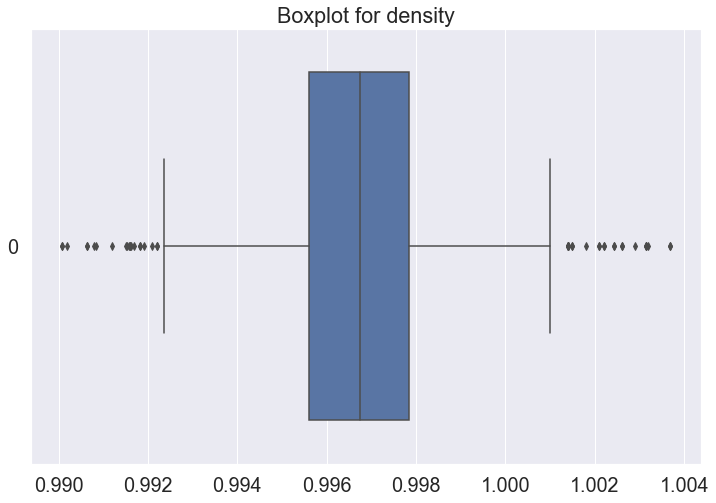

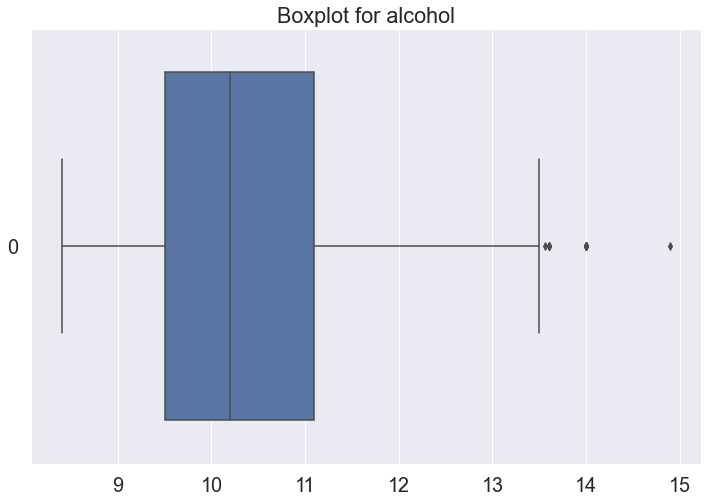

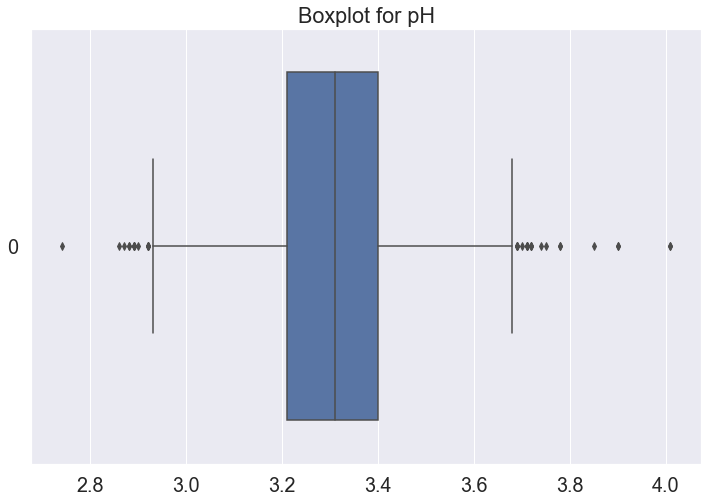

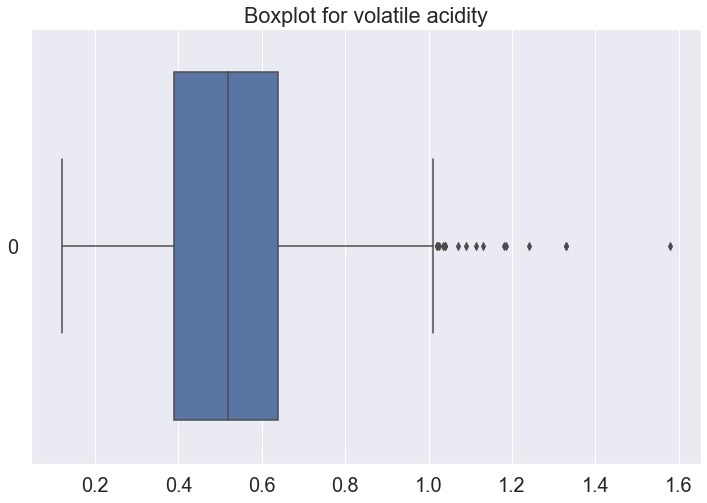

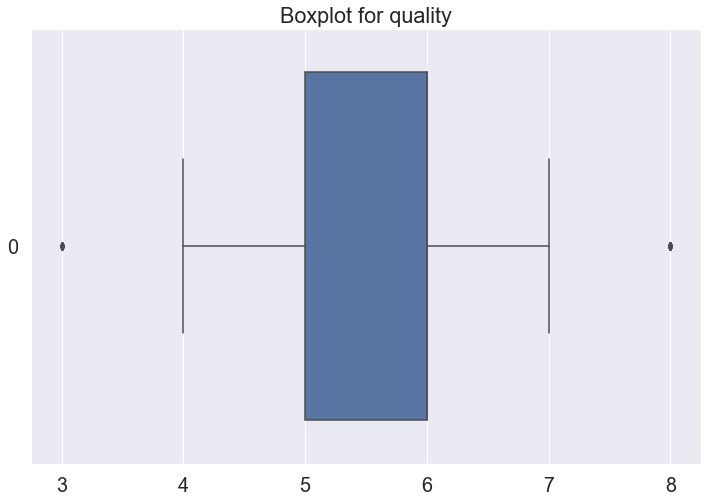

In [8]:
for col in df.columns:
    plt.title(f"Boxplot for {col}")
    sns.boxplot(data=df[col], orient="h")
    plt.show()

if we wanted to, we could choose this definition and remove values not in the above range. but we choose to go with the z-score definition.
</br>
</br>


just out of ciriousity, let's see how many boxplot-defined outliers the z-score definition removed:

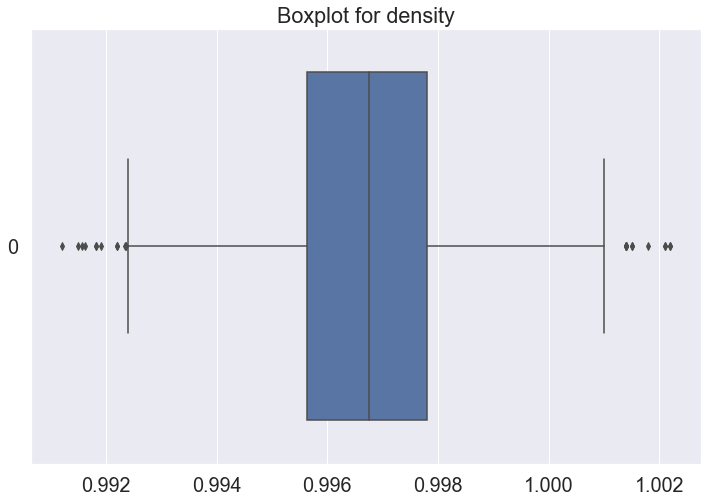

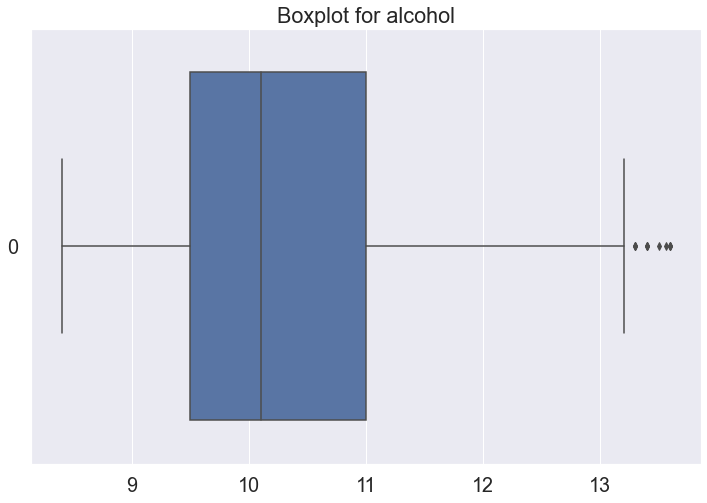

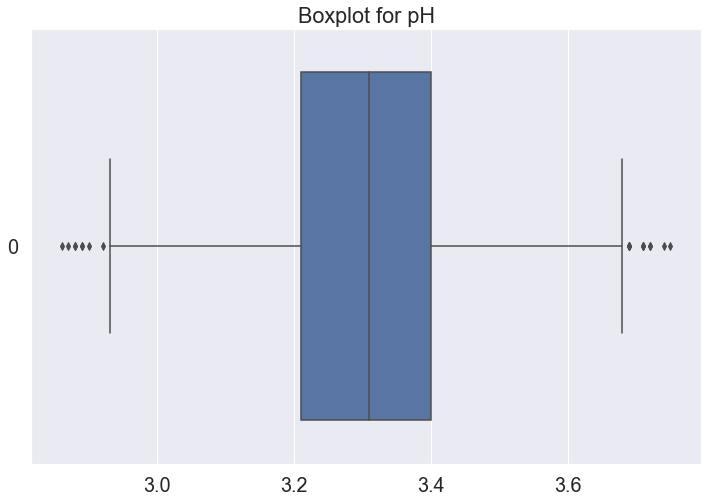

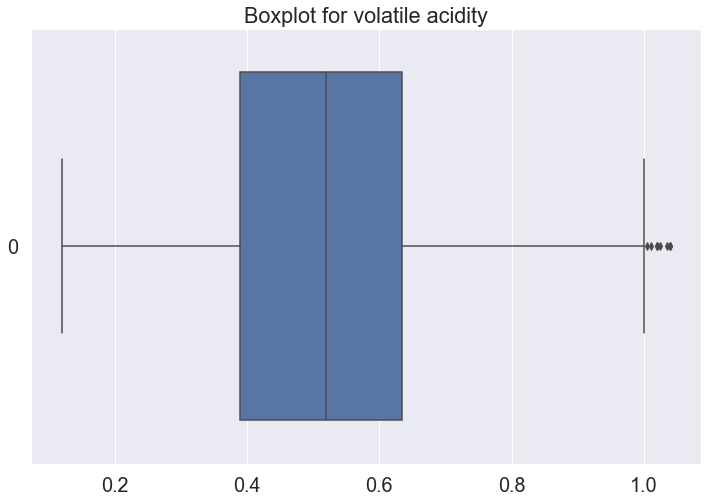

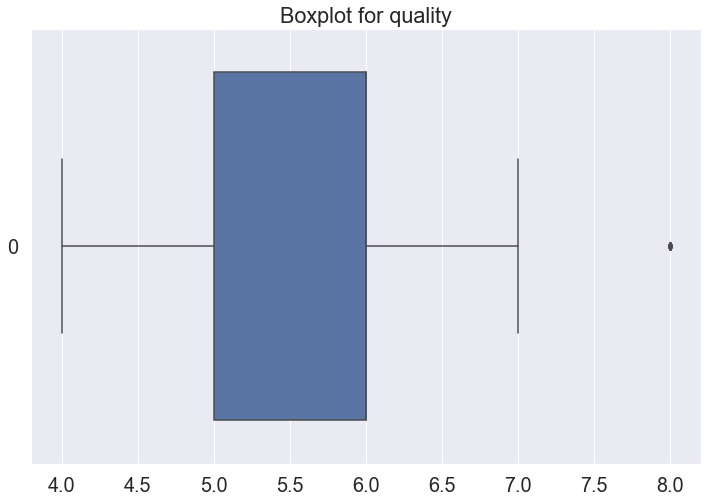

In [9]:
# using df1 instead of df
for col in df1.columns:
    plt.title(f"Boxplot for {col}")
    sns.boxplot(data=df1[col], orient="h")
    plt.show()

indeed removed some of them.

5. Illustrate the covaraince matrix of all variable. Indicate variables most correlated with the target variable. 


/var/folders/41/21yq_s992776m2qf34b8yrq40000gn/T/ipykernel_64086/2348174458.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cov_mat, dtype=np.bool))


Text(0.5, 1.0, 'Covariance Matrix')

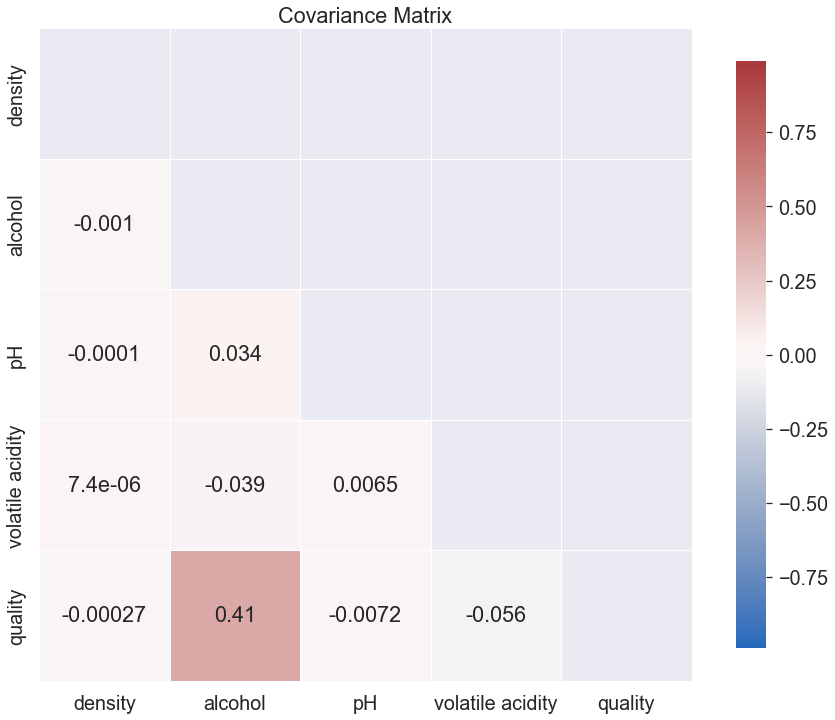

In [10]:
cov_mat = df.cov()

f, ax = plt.subplots(figsize=(16, 12))
mask = np.triu(np.ones_like(cov_mat, dtype=np.bool))

sns.heatmap(cov_mat, mask=mask, vmax=.99, vmin=-0.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9}, annot=True, cmap="vlag")

plt.title("Covariance Matrix")

the column with the highest covariance to the target column is alcohol column with cov=0.41

We can do the same with correlation:

/var/folders/41/21yq_s992776m2qf34b8yrq40000gn/T/ipykernel_64086/710886271.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cov_mat, dtype=np.bool))


Text(0.5, 1.0, 'Correlation Matrix')

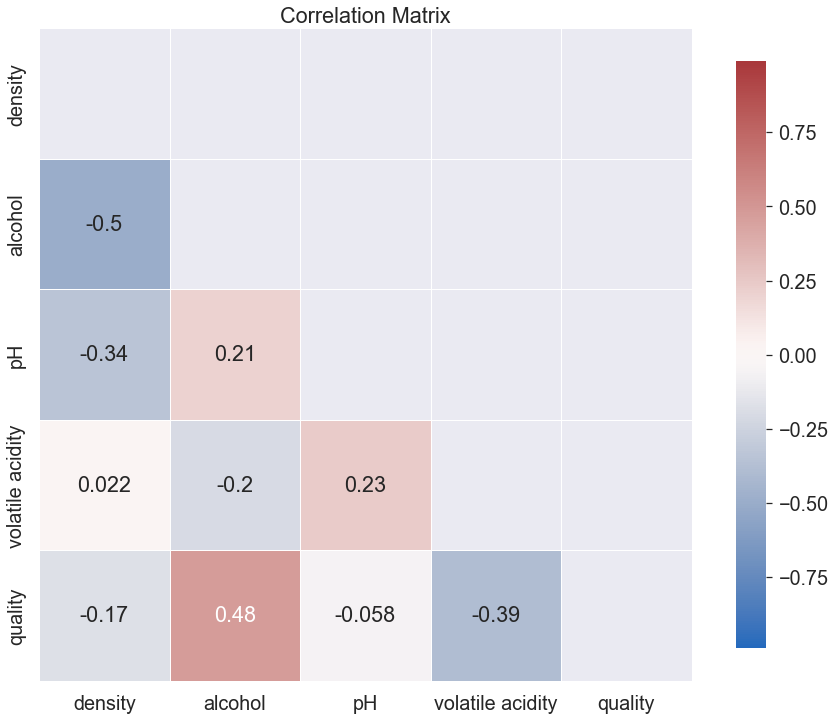

In [11]:
cov_mat = df.corr()

f, ax = plt.subplots(figsize=(16, 12))
mask = np.triu(np.ones_like(cov_mat, dtype=np.bool))

sns.heatmap(cov_mat, mask=mask, vmax=.99, vmin=-0.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9}, annot=True, cmap="vlag")

plt.title("Correlation Matrix")

The column with highest correlation is alcohol. We can also see that volatile acidity has a negative correlation of -0.39 (and cov of -0.05). It is much better to use pearson correlation than covariance in order to unserdtand features relations, because pearson is normalized to the stds of the features.

6. Illustrate a "pairs plot", i.e. a matrix of scatterplots in which each cell involves two variables except the diagonal.


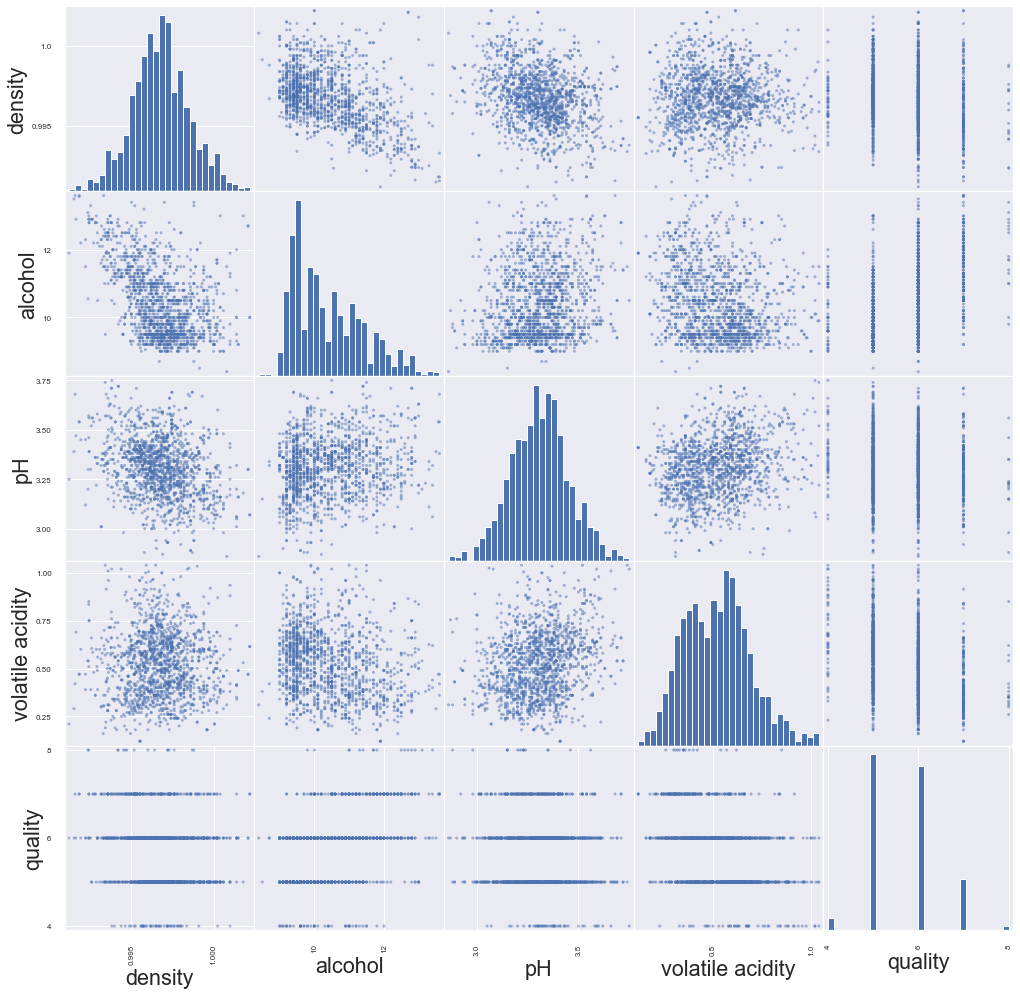

In [12]:
plt.rcParams['figure.figsize'] =  [17, 17]

pd.plotting.scatter_matrix(df1, hist_kwds={'bins': 30})

plt.show()

## Problem 4 (Least squares)

1. Consider the Red Wine Quality Dataset of the previous question. Fit a least squares model to ``quality`` based on the other variables and a constant term. Report on the vector of regression coefficients $\hat{\beta}$. Make sure to indicate which entry is associated with each predictor. 
2. Plot the response values $y$ and the fitted response $\hat{y} = Z^\top \hat{\beta}$
3. Illustrate the histogram of the residual vector $\hat{\epsilon}$; what is the average of this vector?
4. Write a code that verifies: 
 - $\hat{S} = \|\hat{\epsilon}\|^2$
 - $H = H^\top$ 
 - $H^2 = H$
 - $(H-I)^2 = H-I$
 - $\hat{\epsilon}^\top y = 0$ 
 - $\lambda_i(H) \in \{0,1\}$, where $\lambda_i$ is the $i$-th eigenvalue of $H$
 - $\|y\|^2 = \|\hat{\epsilon}\|^2 + \|\hat{y}\|^2$
 - $SS_{Tot} = SS_{Fit} + SS_{Res}$, for the sum of squares decomposition 
 
<hr>
<hr>

1. Consider the Red Wine Quality Dataset of the previous question. Fit a least squares model to ``quality`` based on the other variables and a constant term. Report on the vector of regression coefficients $\hat{\beta}$. Make sure to indicate which entry is associated with each predictor. 

There are 2 ways to get the predictors coefficents, way 1 is using calculus:

In [13]:
# Your code here

x1 = df1['density'].values
x2 = df1['alcohol'].values
x3 = df1['pH'].values
x4 = df1['volatile acidity'].values
y = df1['quality'].values

Z = np.vstack([np.ones_like(x1), x1, x2, x3, x4]).T
A = np.dot(np.linalg.inv(np.dot(Z.T,Z)), Z.T)
beta_hat = np.dot(A, y)

print(f"beta_hat vector = {beta_hat}")
print(f"\n Intercept(ones vector): {beta_hat[0]:.2f}. \n The Coefficient for: \n Density: {beta_hat[1]:.2f}. \n Alcohol {beta_hat[2]:.2f}. \n pH: {beta_hat[3]:.2f}. \n Volatile Acidity {beta_hat[4]:.2f}.")

beta_hat vector = [-15.08716162  19.02827998   0.36204061  -0.42462785  -1.11904944]

 Intercept(ones vector): -15.09. 
 The Coefficient for: 
 Density: 19.03. 
 Alcohol 0.36. 
 pH: -0.42. 
 Volatile Acidity -1.12.


Way 2 is using Gradient Descent (with statsmodels library):

In [14]:
import statsmodels.formula.api as smf

df_for_reg = df1.rename(columns={"volatile acidity": "volatile_acidity"})
model = smf.ols(formula='quality ~ density + alcohol + pH + volatile_acidity', data=df_for_reg).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     185.2
Date:                Fri, 18 Mar 2022   Prob (F-statistic):          1.08e-129
Time:                        17:29:48   Log-Likelihood:                -1500.3
No. Observations:                1549   AIC:                             3011.
Df Residuals:                    1544   BIC:                             3037.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -15.0872     11.078     -1.362      0.173     -36.817       6.642
density             19.0283     10.923      1.742      0.082      -2.397      40.454
alcohol              0.3620      0.019     19.432      0.000       0.325       0.399
pH                  -0.4246      0.121     -3.504      0.000      -0.662      -0.187
volatile_acidity    -1.1190      0.102    -10.952      0.000      -1.319      -0.919
==============================================================================
Omnibus:                        7.644   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.539
Skew:                           0.103   Prob(JB):                       0.0140
Kurtosis:                       3.299   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. Plot the response values $y$ and the fitted response $\hat{y} = Z^\top \hat{\beta}$


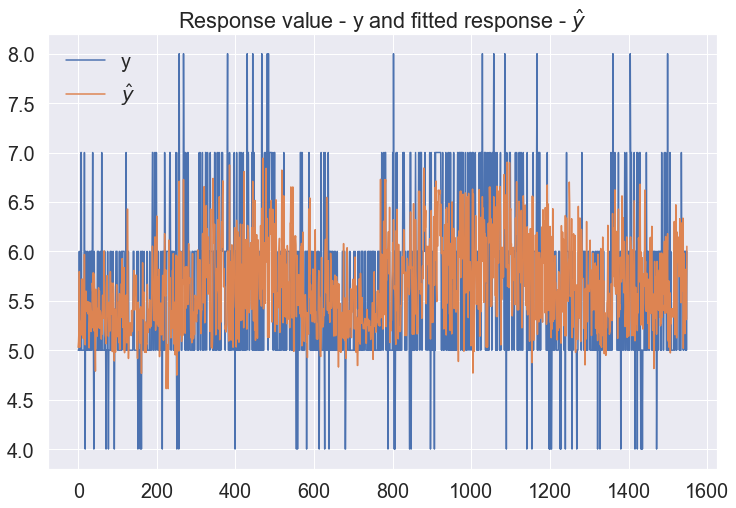

In [15]:

y_hat = np.matmul(Z, beta_hat)


plt.rcParams['figure.figsize'] =  [12, 8]
f, ax = plt.subplots(1, 1)

ax.plot(y, label="y", linestyle="-")
ax.plot(y_hat, label="$\hat{y}$", linestyle="-")
plt.title(r"Response value - y and fitted response - $\hat{y}$")
plt.legend()
plt.show()

3. Illustrate the histogram of the residual vector $\hat{\epsilon}$; what is the average of this vector?


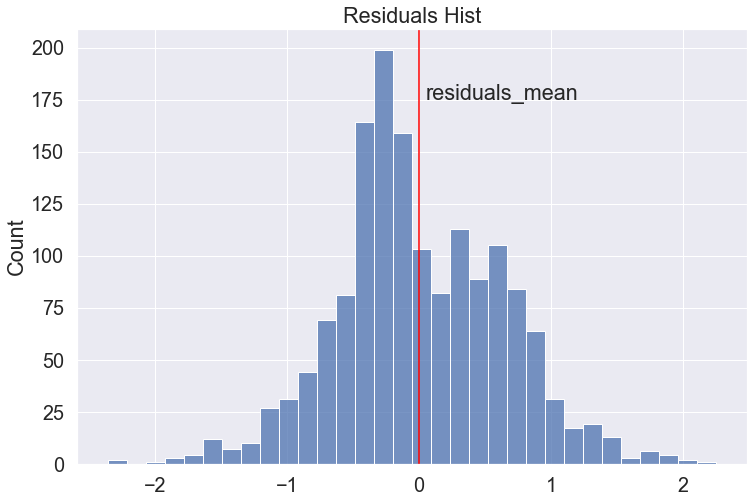

The average of the residuals vector is -0.000


In [16]:
residuals = y - y_hat
residuals_mean = np.mean(residuals)

f, ax = plt.subplots(1, 1)
sns.histplot(residuals, ax=ax)
ax.axvline(x=residuals_mean, color="red")
plt.text(x=residuals_mean + 0.05, y=175, s="residuals_mean")
plt.title("Residuals Hist")
plt.show()

print(f"The average of the residuals vector is {residuals_mean:.3f}")

4. Write a code that verifies: 



 - $\hat{S} = \|\hat{\epsilon}\|^2$


In [17]:
s_hat = np.sum((y-y_hat)**2)

norm_epsilon_hat_square = np.linalg.norm((y-y_hat)) ** 2

assert s_hat == norm_epsilon_hat_square



 - $H = H^\top$ 
 


In [18]:
H = np.matmul(np.matmul(Z, np.linalg.inv(np.dot(Z.T, Z))), Z.T)
np.allclose(H, H.T)

True

 - $H^2 = H$
 


In [19]:
H_squared = H @ H
np.allclose(H, H_squared)

True

 - $(H-I)^2 = H-I$
 


In [20]:
# I - H insteead 
I = np.identity(H.shape[1])
np.allclose(np.matmul(I-H, I-H), I-H)

True

 - $\hat{\epsilon}^\top \hat{y} = 0$ 
 


In [21]:
# y_hat instead of y
res = residuals.T @ y_hat
np.allclose(np.round(res, 5), np.zeros_like(res, dtype="float64"))

True


 - $\lambda_i(H) \in \{0,1\}$, where $\lambda_i$ is the $i$-th eigenvalue of $H$
 


In [22]:
all(np.round(eigval.real,5) >= 0 and np.round(eigval.real,5) <= 1 for eigval in np.linalg.eigvals(H))

True

 - $\|y\|^2 = \|\hat{\epsilon}\|^2 + \|\hat{y}\|^2$
 


In [23]:
norm_y_square = y @ y 
norm_y_hat_square = y_hat @ y_hat

np.allclose(norm_y_square, norm_epsilon_hat_square + norm_y_hat_square)

True

 - $SS_{Tot} = SS_{Fit} + SS_{Res}$, for the sum of squares decomposition 
 

In [24]:
y_mean = np.mean(y)
ss_tot = np.sum((y-y_mean)**2)
ss_fit = np.sum((y_hat-y_mean)**2)
ss_res = np.sum((y-y_hat)**2)

np.allclose(ss_tot, ss_res + ss_fit)
print(f"ss_tot={ss_tot:.3f}, ss_res + ss_fit = {(ss_res + ss_fit):.3f}")

ss_tot=931.141, ss_res + ss_fit = 931.141


$\newcommand{\var}{\mathrm{Var}}$
## Problem 5 (Weighted least squares)
In some cases we may want to weigh differently the controbution of each coordinate to the loss function. For example, this may be because not all meaasuremetns are equally reliable (e.g., new measurements may be more reliable than old ones). One way to account for this difference in reliability is by considering a *weighted* least squares problem, in which we seek $(\beta_1,\ldots,\beta_p) \in \reals^p$ to minimize 
$$
S(\beta_1,\ldots,\beta_p) := 
\sum_{i=1}^n w_i^2\left(y_i - \sum_{j=1}^p z_{ij} \beta_j \right)^2 = (\epsilon W)^\top (\epsilon W),
$$
where $W = (w_1, \ldots, w_n)$, $w_i>0$ for all $i=1,\ldots,n$ are the weights associated with the reliability of each coordinate. 
<hr>
<hr>

1. Write the corresponding normal equations in a matrix form

The normal equations are (after dividing by -2, beacuse of the derivative):
</br>
</br>
$\hat{\epsilon}^T Z W^T = 0 \Leftrightarrow  Z^T W \hat{\epsilon}^T = 0 \Leftrightarrow Z^T W Z\hat{\beta} = Z^T W y$</br>
</br>


2. Find the optimal vector of weights $\hat{\beta}$ minimizing $S(\beta_1,\ldots,\beta_p)$ in terms of $W$, $Z$, and $y$.


The optimal vector of weights $\hat{\beta}$ minimizing $S(\beta_1,\ldots,\beta_p)$ in terms of $W$, $Z$, and $y$ is: 
</br>
</br>
$$
\hat{\beta} := (Z^T W Z)^{-1}Z^T W y
$$
</br>
</br>


3. What is the hat matrix? make sure that your expression reduces to the hat matrix from class when $W$ is the identity matrix.

$$
H = Z(Z^T W Z)^{-1} Z
$$

and obviously the expression reduces to the same hat matrix from class when $$ W = I $$
</br>
$$
H = Z(Z^T I Z)^{-1} Z = H = Z(Z^T Z)^{-1} Z
$$
</br>
</br>

$\newcommand{\var}{\mathrm{Var}}$
## Problem 6 (Sampling from $\mathcal N(0,1)$, $\chi^2$, $t$, and $F$)
In the following excerise, you can only sample using repeated calls to ``random.random()``. 
You can use the ``scipy.stats`` package *only* to illustrate PDFs. You should illustrate histograms with the number of bins between 5%-10% of the number of samples $n=1,000$ in the input to the histogram. For example, use $100$ bins equally spaced between the range of the samples, so that you'll get a nice comparison between the empirical distribution and the theoretic distribution represented by the PDF. Make sure that the histogram is normalized to approximate the density of the simulated random variable. Set the seed ``random.seed(my_id)`` where ``my_id`` is your ID number with leading zeros removed. 

1. Implement the functions ``sample_unif``, ``sample_normal_clt``, and ``sample_normal``. Illustrate the histogram of $1000$ samples from ``sample_normal_clt`` and $1000$ samples from ``sample_normal``. Choose the input to ``sample_normal_clt`` so that the two histogram look alike. 
2. Implement the functions ``sample_chisq``, ``sample_t``, and ``sample_f``. You should use ``sample_normal`` repeatedly. 
3. Use ``sample_normal`` to sample $1000$ times from $\mathcal N(0,1)$ and use one figure to illustrate the histogram of the samples and the true PDF of $\mathcal N(0,1)$
4. Use ``sample_chisq`` to sample $1000$ times from $\chi^2_k$ and use one figure to illustrate the histogram of the samples and the true PDF of $\chi^2_k$; for $k=5$ and $k=10$.
5. Use ``sample_t`` to sample $1000$ times from $t_k$ (the $t$-distribution with $k$ degrees of freedom) and use one figure to illustrate the histogram of the samples and the true PDF of $t_k$; for $k=5$ and $k=10$.
6. Use ``sample_F`` to sample $1000$ times from $F_{k_1,k_2}$ and use one figure to illustrate the histogram of the samples and the true PDF of $F_{k_1,k_2}$; for $(k_1, k_2)= (10,5)$ and $(k_1, k_2)= (50,45)$.

In [25]:
import random
from scipy.stats import norm
import numpy as np


def sample_unif(n: int) -> float:
    """
    return n independent samples from the uniform distribution over (0,1)
    """
    
    return np.array([random.random() for _ in range(n)])


def sample_normal_clt(n: int) -> float:
    """
    Approximately sample from the standard normal distribution using the CLT 
    
    Args:
    -----
    :n:    number of samples from a non-normal distribution
    
    Returns:
    -------
    
    :z:    random sample approximately from the standard normal distribution
    
    """
    # sample n non-normal (in this case, uniform) samples, sum them and then normalize them
    sums = np.array([np.sum(sample_unif(n)) for _ in range(n)])
    z_samples = (sums - sums.mean()) / sums.std()
    """
    I could do the following and sample only 1 but it took a lot of time, so I just return n smaples.
    z = standard_normal[int(random.random() * len(standard_normal))]
    """
    return z_samples
    
    
# I deleted n: int because it is useless.
def sample_normal() -> float:
    """
    Sample from the standard normal distribution using a single sample
    from the uniform distribution. You should use the normal quantile function
    ``norm.ppf``
    
    Args:
    -----
    :n:    number of samples from a non-normal distribution
    
    Return:
    -------
    :z:    random sample from the standard normal distribution
    
    """
    z = norm.ppf(q=sample_unif(1))
    return z



def sample_chisq(k: int) -> float:
    """
    Sample from the chisquared distribution with k degrees of freedom
    
    Args:
    -----
    :k:    number of degrees of freedom (DoF)
    
    Return:
    -------
    :x:    random sample from the chisquared distribution with k degrees of freedom
    
    """
    
    normal_samples_squared = np.array([sample_normal() for _ in range(k)]) ** 2  # k is degrees of freedom
    x = np.sum(normal_samples_squared)
    return x
    

def sample_t(k: int) -> float:
    """
    Sample from the t distribution with k degrees of freedom
    
    Args:
    -----
    :k:    number of degrees of freedom
    
    Return:
    -------
    :x:    random sample from the t distribution
    
    """
    z = sample_normal()
    x = sample_chisq(k=k)
    t = z / np.sqrt(x / k)

    return t
    


def sample_f(k1: int, k2:int) -> float:
    """
    Sample from the F distribution with k1 over k2 degrees of freedom
    
    Args:
    -----
    :k1:    number of degrees of freedom numerator
    :k2:    number of degrees of freedom denominator
    
    Return:
    -------
    :x:    random sample from the F distribution
    
    """
    f = ( sample_chisq(k=k1) / k1 ) / ( sample_chisq(k=k2) / k2 )
    return f

In [26]:
MY_ID = 207380528 # your personal ID number with leading zeros removed
random.seed(MY_ID)

# Your code to items 2-4 goes here:
# 


1. Implement the functions ``sample_unif``, ``sample_normal_clt``, and ``sample_normal``. Illustrate the histogram of $1000$ samples from ``sample_normal_clt`` and $1000$ samples from ``sample_normal``. Choose the input to ``sample_normal_clt`` so that the two histogram look alike. 


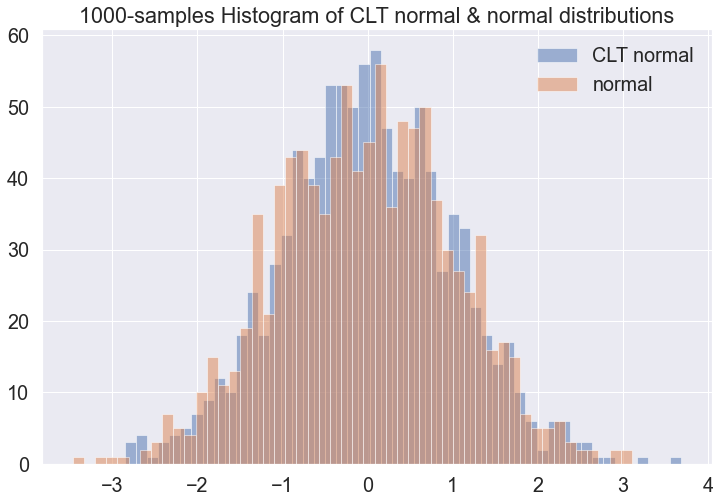

In [27]:
random.seed(MY_ID)

NUM_SAMPLES = 1000
BINS = int(NUM_SAMPLES * 0.05)

normal_clt_samples = sample_normal_clt(NUM_SAMPLES)
normal_samples = np.array([sample_normal() for _ in range(NUM_SAMPLES)])
plt.hist(normal_clt_samples, bins=BINS, label="CLT normal", alpha=0.5)
plt.hist(normal_samples, bins=BINS, label="normal", alpha=0.5)
plt.legend()
plt.title(f"{NUM_SAMPLES}-samples Histogram of CLT normal & normal distributions")
plt.show()


2. Implement the functions ``sample_chisq``, ``sample_t``, and ``sample_f``. You should use ``sample_normal`` repeatedly. 


Implemented above


3. Use ``sample_normal`` to sample $1000$ times from $\mathcal N(0,1)$ and use one figure to illustrate the histogram of the samples and the true PDF of $\mathcal N(0,1)$


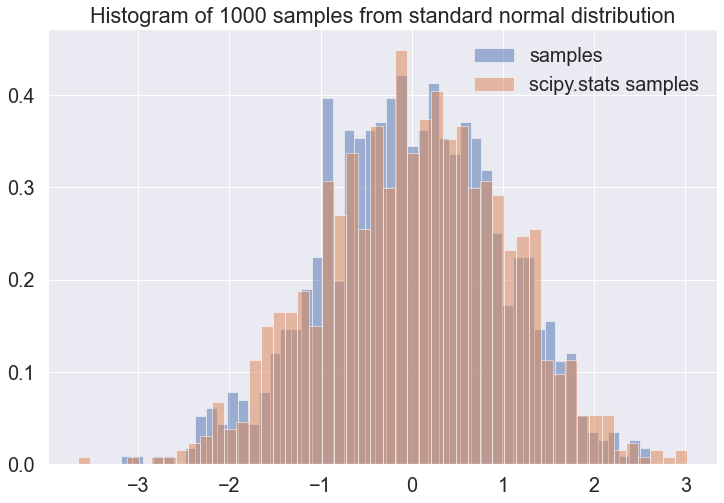

In [28]:
random.seed(MY_ID)

samples = np.array([sample_normal() for _ in range(NUM_SAMPLES)])
stats_samples = stats.norm.rvs(size=NUM_SAMPLES)
plt.hist(samples, bins=BINS, label="samples", density=True, alpha=0.5)
plt.hist(stats_samples, bins=BINS, label="scipy.stats samples", density=True, alpha=0.5)    
plt.title(f"Histogram of {NUM_SAMPLES} samples from standard normal distribution")
plt.legend()
plt.show()


4. Use ``sample_chisq`` to sample $1000$ times from $\chi^2_k$ and use one figure to illustrate the histogram of the samples and the true PDF of $\chi^2_k$; for $k=5$ and $k=10$.


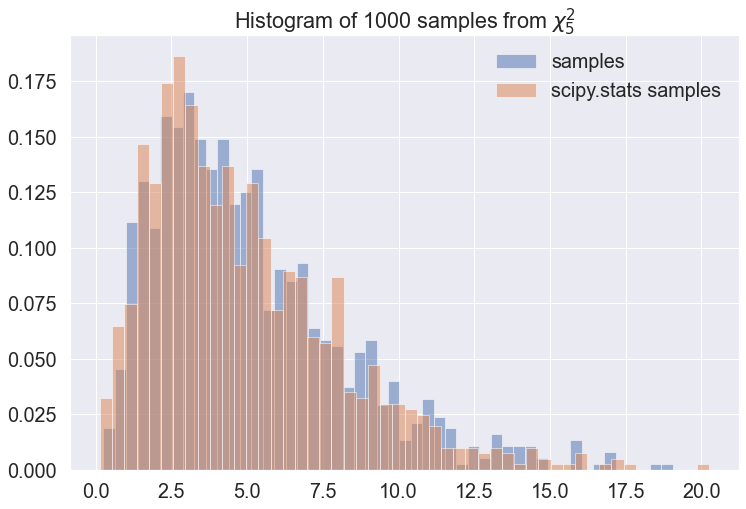

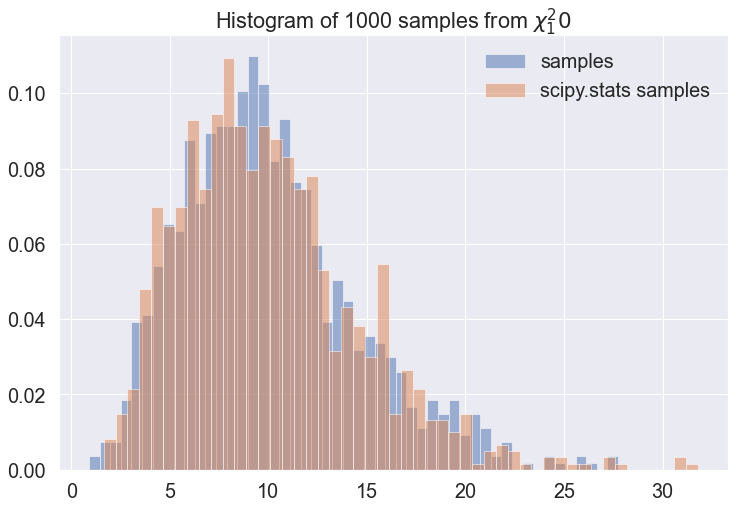

In [29]:
random.seed(MY_ID)

for df in [5, 10]:
    samples = np.array([sample_chisq(df) for _ in range(NUM_SAMPLES)])
    stats_samples = stats.chi2.rvs(df, size=NUM_SAMPLES)
    plt.hist(samples, bins=BINS, label="samples", density=True, alpha=0.5)
    plt.hist(stats_samples, bins=BINS, label="scipy.stats samples", density=True, alpha=0.5)    
    plt.title(f"Histogram of {NUM_SAMPLES} samples from $\chi^2_{df}$")
    plt.legend()
    plt.show()


5. Use ``sample_t`` to sample $1000$ times from $t_k$ (the $t$-distribution with $k$ degrees of freedom) and use one figure to illustrate the histogram of the samples and the true PDF of $t_k$; for $k=5$ and $k=10$.


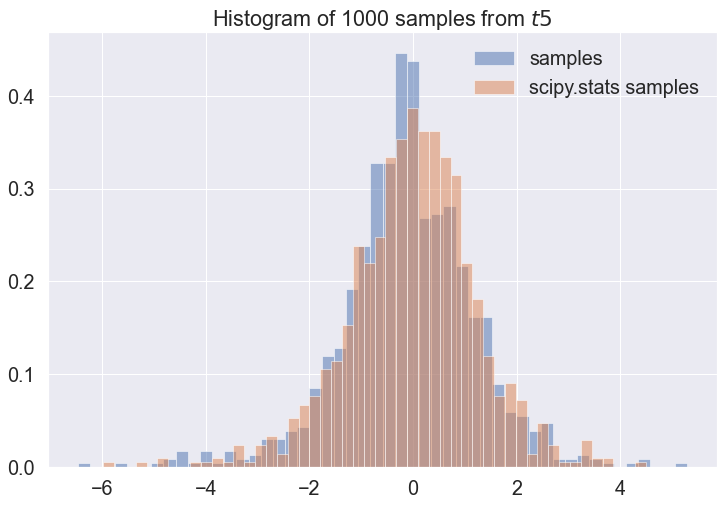

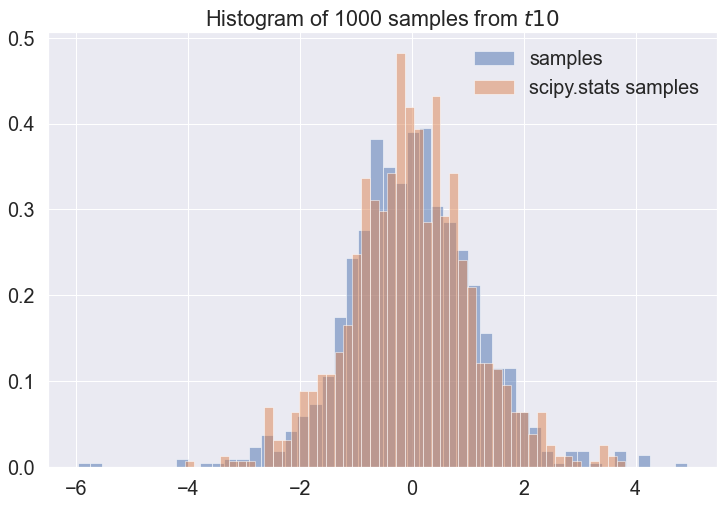

In [30]:
random.seed(MY_ID)

for df in [5, 10]:
    samples = np.array([sample_t(df) for _ in range(NUM_SAMPLES)])
    stats_samples = stats.t.rvs(df, size=NUM_SAMPLES)
    plt.hist(samples, bins=BINS, label="samples", density=True, alpha=0.5)
    plt.hist(stats_samples, bins=BINS, label="scipy.stats samples", density=True, alpha=0.5)    
    plt.title(f"Histogram of {NUM_SAMPLES} samples from $t {df}$")
    plt.legend()
    plt.show()


6. Use ``sample_F`` to sample $1000$ times from $F_{k_1,k_2}$ and use one figure to illustrate the histogram of the samples and the true PDF of $F_{k_1,k_2}$; for $(k_1, k_2)= (10,5)$ and $(k_1, k_2)= (50,45)$.

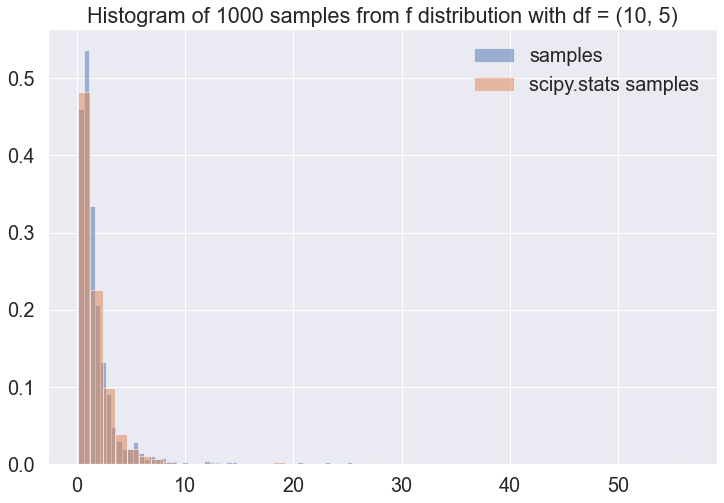

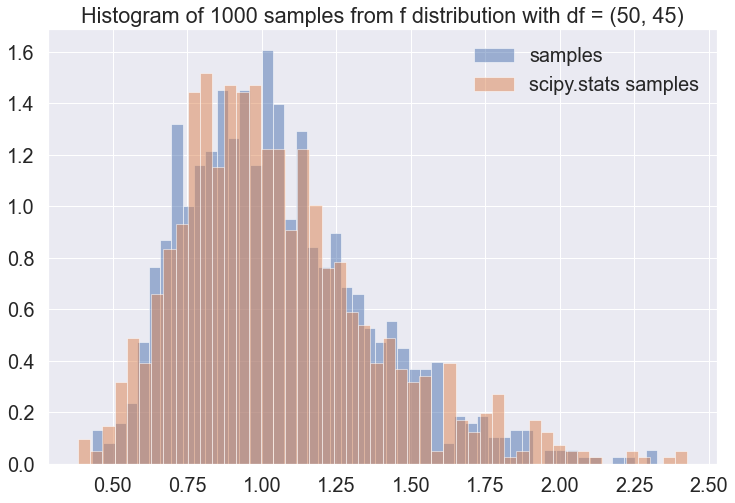

In [31]:
random.seed(MY_ID)

for df in [(10, 5), (50, 45)]:
    samples = np.array([sample_f(df[0], df[1]) for _ in range(NUM_SAMPLES)])
    stats_samples = stats.f.rvs(df[0], df[1], size=NUM_SAMPLES)
    plt.hist(samples, bins=BINS, label="samples", density=True, alpha=0.5)
    plt.hist(stats_samples, bins=BINS, label="scipy.stats samples", density=True, alpha=0.5)    
    plt.title(f"Histogram of {NUM_SAMPLES} samples from f distribution with df = {df}")
    plt.legend()
    plt.show()

<hr>
<hr>